In [1]:
from helpers import *

In [3]:
df = pd.read_csv("rfm_review_score_undersample.csv")
df.head()

,recency_score,frequency_score,monetary_score,avg_satisfaction
0,5,1,1,3.0
1,2,1,2,3.0
2,4,1,4,3.0
3,5,1,5,4.0
4,1,1,5,5.0


## Checking RFM 3D 

In [4]:
show_3d(df, "recency_score", "frequency_score", "monetary_score")

In [6]:
df_norm = normalize_dataframe(df)
df_norm.head()

,recency_score,frequency_score,monetary_score,avg_satisfaction
0,1.00,0.0,0.00,0.50
1,0.25,0.0,0.25,0.50
2,0.75,0.0,0.75,0.50
3,1.00,0.0,1.00,0.75
4,0.00,0.0,1.00,1.00


## Check RFM Normalised data

In [8]:
show_3d(df_norm, "recency_score", "frequency_score", "monetary_score")

## PCA 2 Components without review

Projecting 3-dimensional data to 2D


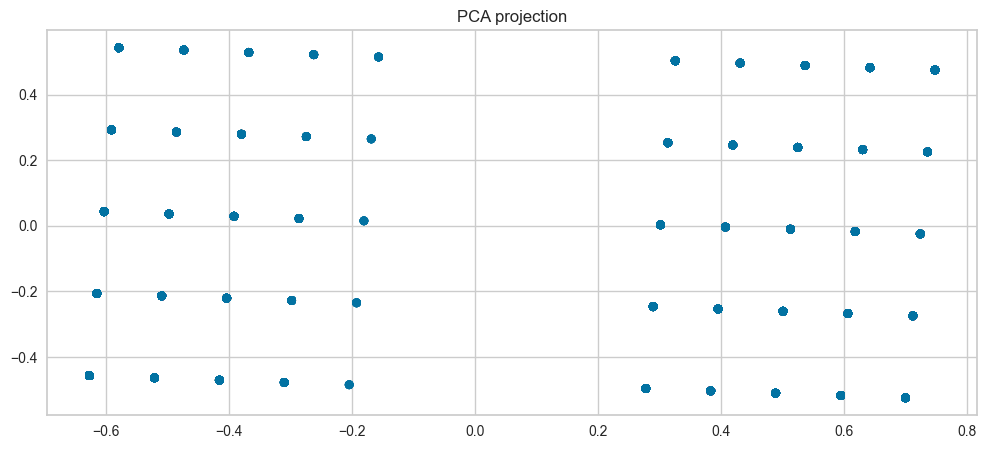

In [9]:
## Checking with PCA, reducing to 2 dimensions
pca = PCA(n_components=2)
X_without_reviews = df_norm[["recency_score", "frequency_score", "monetary_score"]]
X_reduced_without_reviews = pca.fit_transform(X_without_reviews)

print('Projecting %d-dimensional data to 2D' % X_without_reviews.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced_without_reviews[:, 0], X_reduced_without_reviews[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

## PCA 2 Components with reviews

Projecting 4-dimensional data to 2D


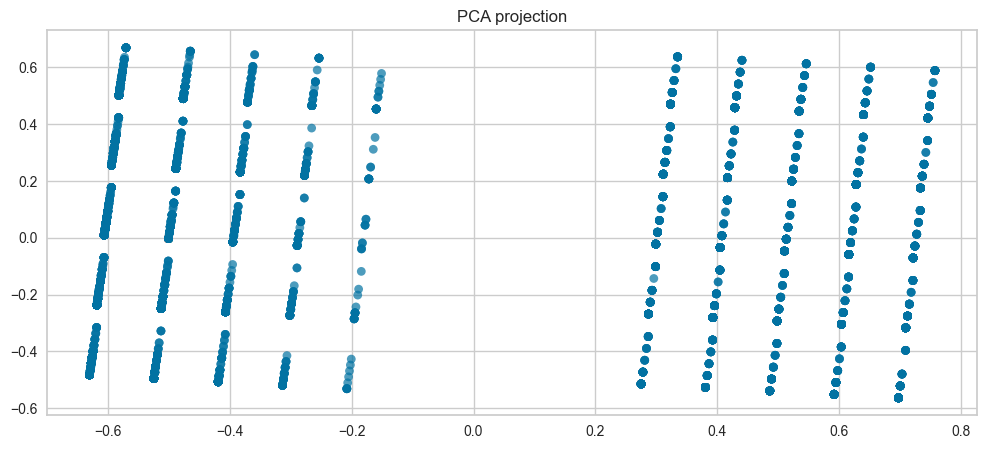

In [10]:
## Checking with PCA, reducing to 2 dimensions
pca = PCA(n_components=2)
X = df_norm
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

## TSNE without PCA & without reviews

In [11]:
tsne = TSNE(random_state=42)
X_tsne_no_pca_without_reviews = tsne.fit_transform(X_without_reviews)

Text(0.5, 1.0, 'TSNE without PCA & without reviews')

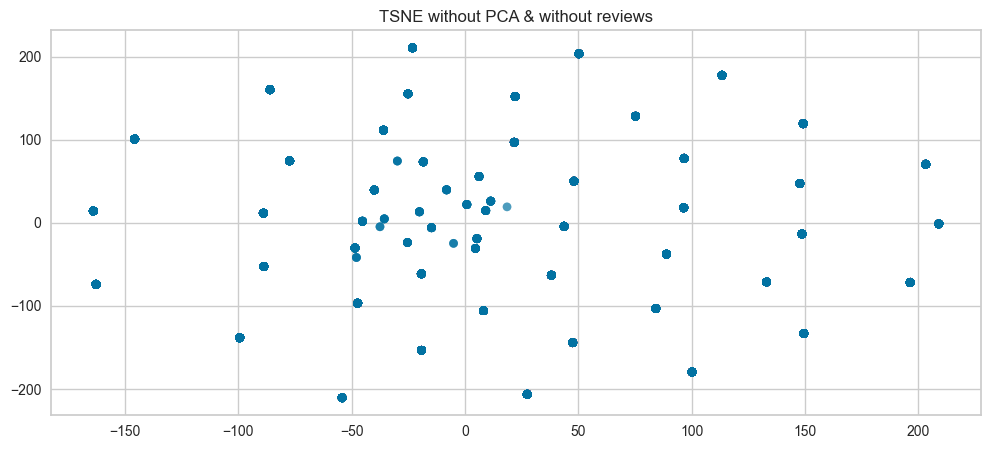

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_no_pca_without_reviews[:, 0], X_tsne_no_pca_without_reviews[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE without PCA & without reviews')

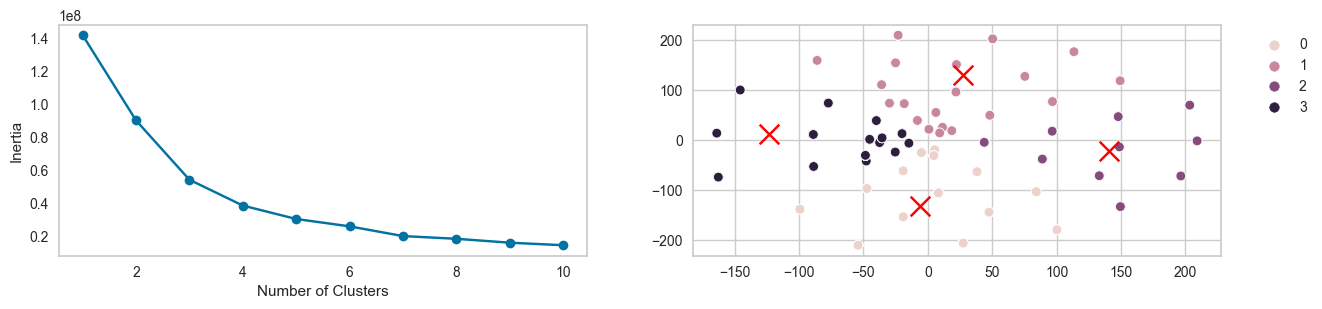

<Figure size 1000x300 with 0 Axes>

In [13]:
show_segmentation(X_tsne_no_pca_without_reviews, 4)

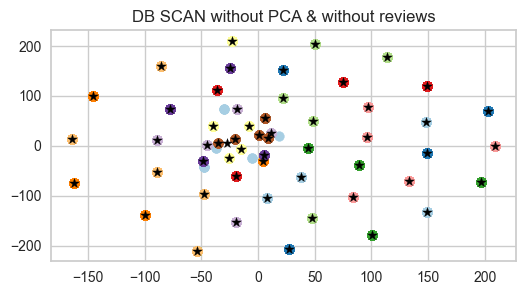

In [14]:
do_dbscan(X_tsne_no_pca_without_reviews, "DB SCAN without PCA & without reviews")

## TSNE without PCA & with reviews

In [15]:
tsne = TSNE(random_state=42)
X_tsne_no_pca = tsne.fit_transform(X)

Text(0.5, 1.0, 'TSNE without PCA & with reviews')

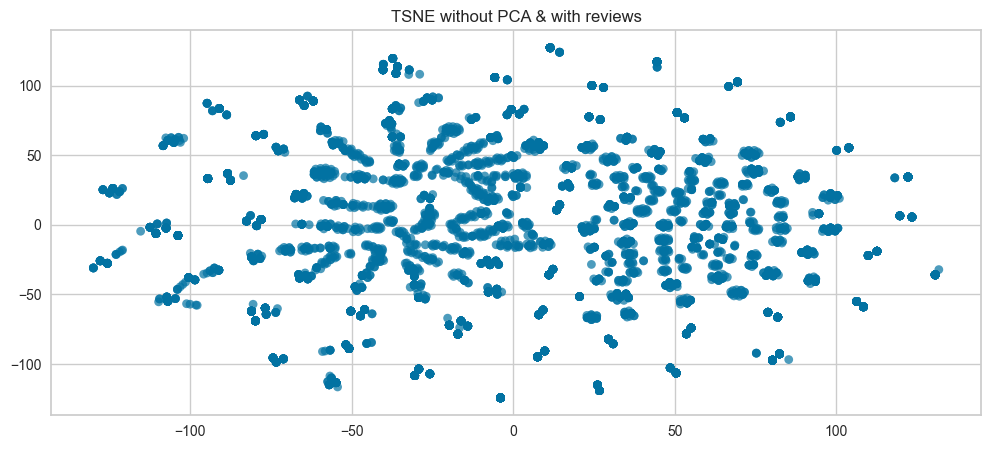

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_no_pca[:, 0], X_tsne_no_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE without PCA & with reviews')

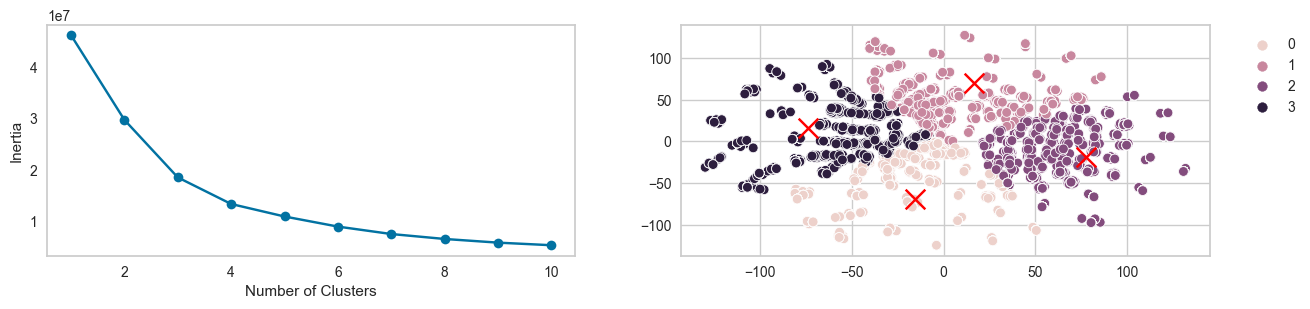

<Figure size 1000x300 with 0 Axes>

In [17]:
show_segmentation(X_tsne_no_pca, 4)

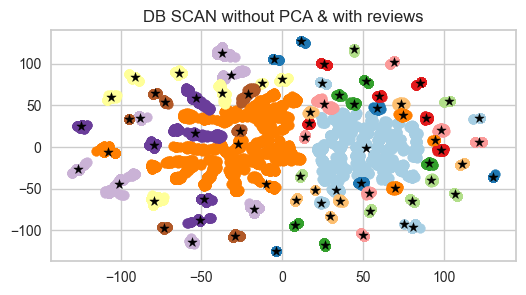

In [18]:
do_dbscan(X_tsne_no_pca, "DB SCAN without PCA & with reviews")

## TSNE with PCA & without reviews

In [19]:
tsne = TSNE(random_state=42)
X_tsne_pca_without_reviews = tsne.fit_transform(X_reduced_without_reviews)

Text(0.5, 1.0, 'TSNE with PCA & without reviews')

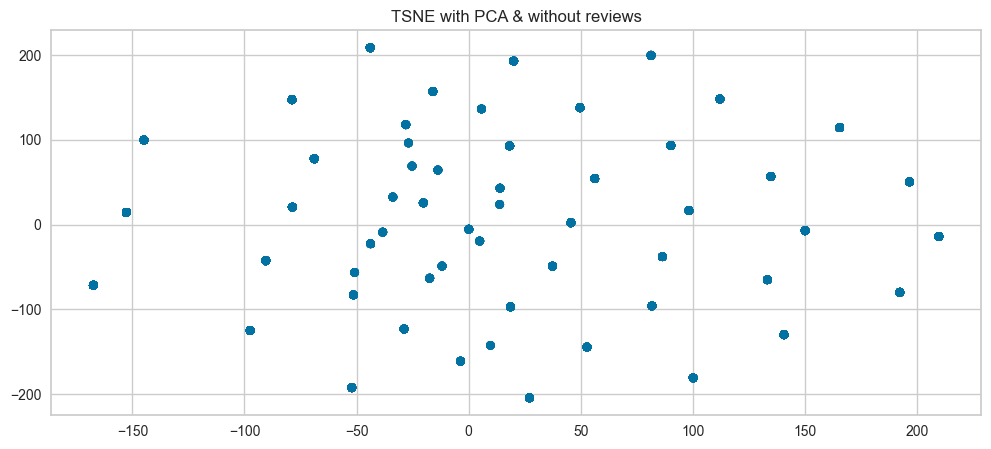

In [20]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca_without_reviews[:, 0], X_tsne_pca_without_reviews[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA & without reviews')

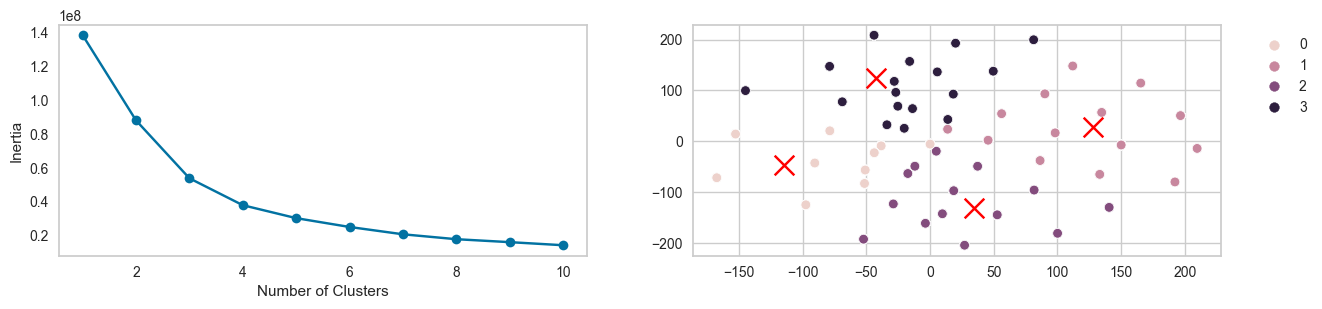

<Figure size 1000x300 with 0 Axes>

In [21]:
show_segmentation(X_tsne_pca_without_reviews, 4)

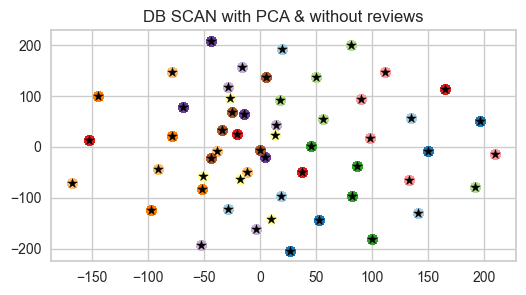

In [22]:
do_dbscan(X_tsne_pca_without_reviews, "DB SCAN with PCA & without reviews")

## TSNE with PCA & with reviews

In [23]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE with PCA & with reviews')

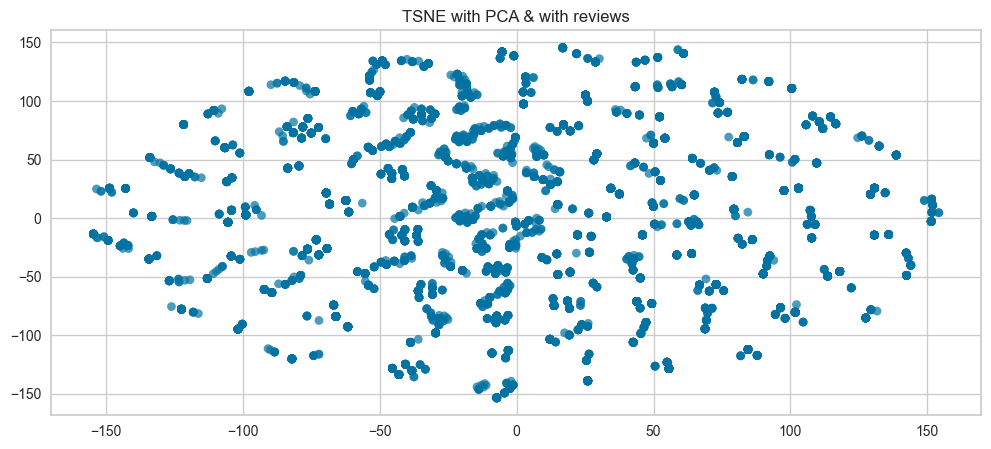

In [24]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA & with reviews')

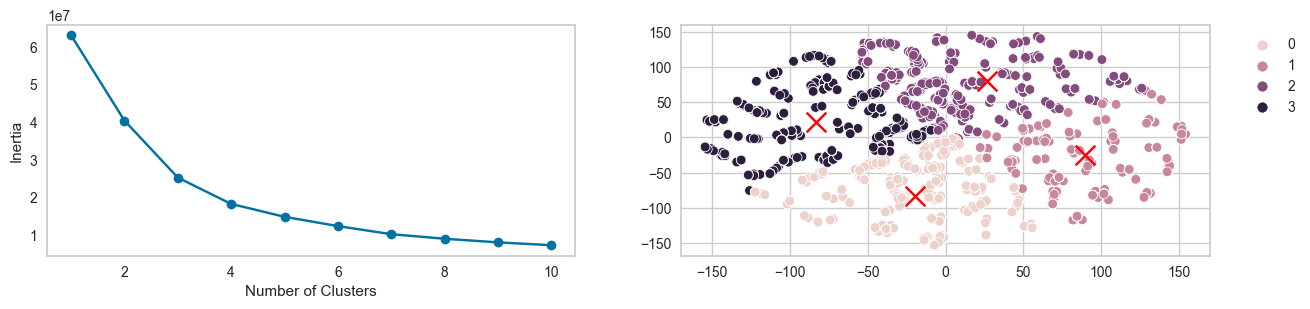

<Figure size 1000x300 with 0 Axes>

In [25]:
show_segmentation(X_tsne_pca, 4)

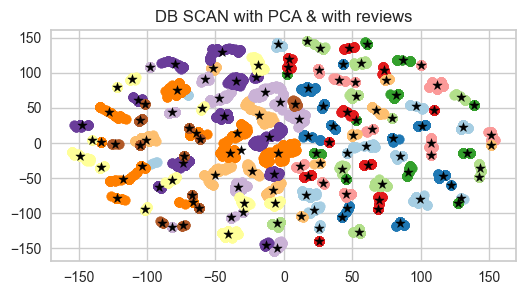

In [26]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews")

## DONE

#### PCA Explainability (without review)

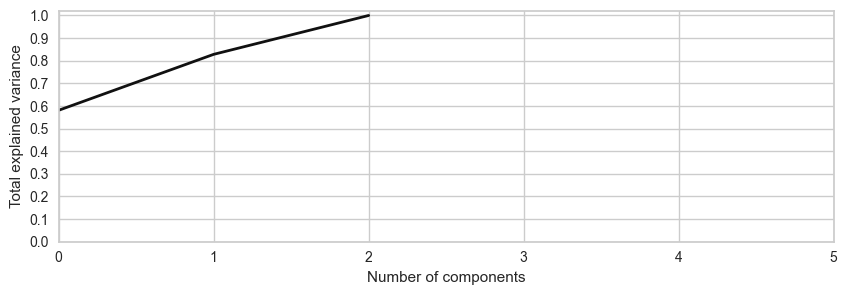

In [28]:
df_norm_without_review = df_norm[["recency_score", "frequency_score", "monetary_score"]]
pca = PCA().fit(df_norm_without_review)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [29]:
# perform PCA on the data  
pca = PCA(n_components=1)  
pca.fit(df_norm_without_review)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df_norm_without_review.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

           Feature   Loading
0    recency_score -0.047858
2   monetary_score -0.422528
1  frequency_score -0.905085


In [30]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 


In [31]:
loadings_df

,Feature,Loading,Contribution
0,recency_score,-0.047858,0.00133
2,monetary_score,-0.422528,0.10371
1,frequency_score,-0.905085,0.47586


#### PCA Explainability with review

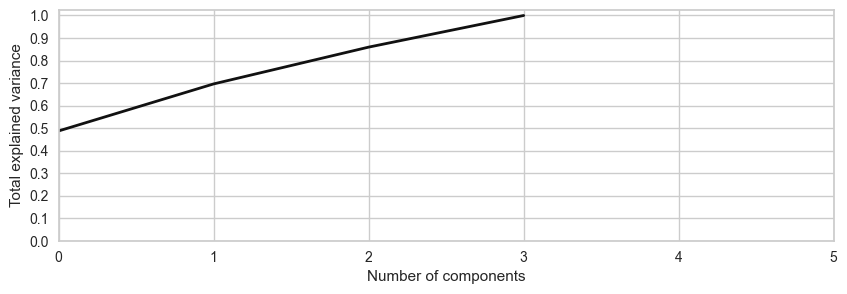

In [32]:
pca = PCA().fit(df_norm)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [33]:
# perform PCA on the data  
pca = PCA(n_components=1)  
pca.fit(df_norm)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df_norm.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

            Feature   Loading
3  avg_satisfaction -0.011706
0     recency_score -0.048183
2    monetary_score -0.422225
1   frequency_score -0.905134


In [34]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 
loadings_df

,Feature,Loading,Contribution
3,avg_satisfaction,-0.011706,0.00007
0,recency_score,-0.048183,0.00113
2,monetary_score,-0.422225,0.08690
1,frequency_score,-0.905134,0.39934


In [39]:

def do_dbscan(X_choosen, title, eps=7, min_samples=5):

    # 1. Apply DBSCAN clustering  
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    # dbscan = DBSCAN(eps=10, min_samples=5)  
    cluster_labels = dbscan.fit_predict(X_choosen)  


    # 2. Determine centroids of clusters  
    unique_labels = np.unique(cluster_labels)  
    centroids = []

    for label in unique_labels:  
        mask = cluster_labels == label  
        cluster_points = X_choosen[mask]  
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)  

    centroids = np.array(centroids)
    colormap = cm.get_cmap("Paired", len(unique_labels))  
    colormap_array = colormap.colors  

    # Plot t-SNE scatter plot with centroids and different colors  
    plt.figure(figsize=(6, 3))  
    for i, label in enumerate(unique_labels):
        mask = cluster_labels == label  
        plt.scatter(X_choosen[mask, 0], X_choosen[mask, 1], color=colormap(i), label=f'Cluster {label}')  

    # Plot centroids with black star marker  
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='black', s=50)  

    plt.title(title)  
    plt.show()
    
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  
    # Compute the average silhouette score  
    average_score = silhouette_score(df, cluster_labels)
        
    # Compute the silhouette scores for each sample  
    sample_scores = silhouette_samples(df, cluster_labels)  
    
    # Create a new dataframe with the sample scores and the corresponding cluster label  
    df_silhouette = pd.DataFrame({'SilhouetteScore': sample_scores, 'Cluster': cluster_labels})  
    
    # Plot the silhouette graph  
    fig, ax = plt.subplots(figsize=(8, 6))  
    sns.boxplot(x='Cluster', y='SilhouetteScore', data=df_silhouette, ax=ax, palette=colormap_array)  
    sns.stripplot(x='Cluster', y='SilhouetteScore', data=df_silhouette, ax=ax, size=4, color="gray", edgecolor="gray", alpha=0.7)  
    ax.set_xlabel('Cluster')  
    ax.set_ylabel('Silhouette Score')  
    ax.axhline(y=average_score, color="red", linestyle="--")  
    ax.set_title('Silhouette scores of clusters')  
    
    print("n_clusters", n_clusters)
    # Display the plot  
    plt.show()  

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_48529/3641495074.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



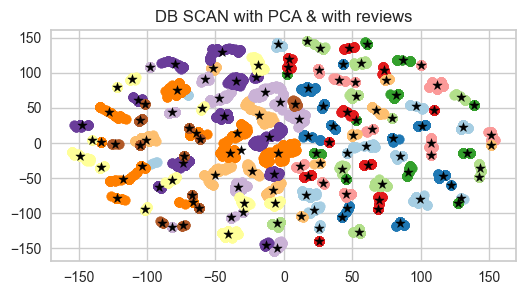

n_clusters 141


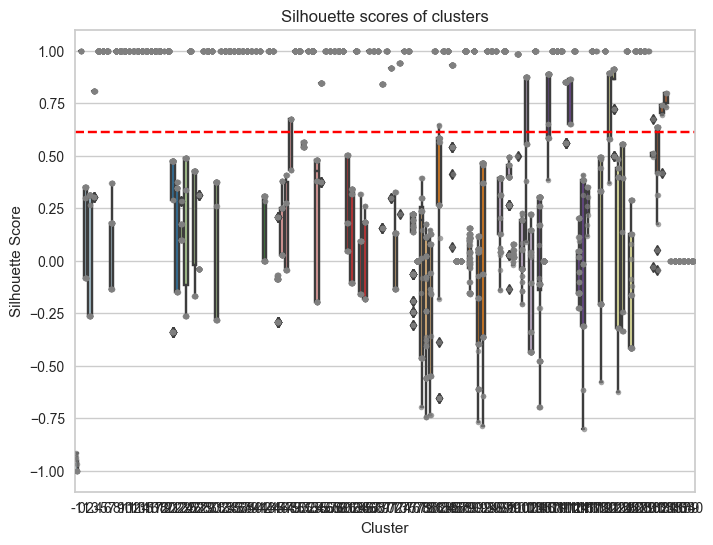

In [40]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews")

The silhouette graph displays the silhouette scores of each sample in each cluster. 

The silhouette score measures how close each sample in one cluster is to the other samples in its own cluster compared to the samples in the neighboring clusters.

It ranges from -1 to 1:
- score close to 1 indicates that the sample is well-matched to its own cluster
- score close to -1 indicates that the sample may be misclassified and potentially belongs to a neighboring cluster.

Each boxplot represents a cluster, and the y-axis represents the silhouette score.
The boxes in the boxplot represent the interquartile range (IQR) of the silhouette scores within the cluster.

The whiskers extend from the box to the top and bottom, representing the range of the data within 1.5 times the IQR.

Any data points beyond the whiskers are considered outliers.
The dots or strips overlaid on the box plot represent individual sample silhouette scores

The red dashed line in the graph represents the average silhouette score across all samples and clusters.

This line provides a reference point to assess the overall quality of the clustering results. 
- closer to 1, it indicates that the clusters are well-separated and compact. 
- closer to -1, it suggests that the clusters may be overlapping or that there are misclassified samples.

The score of -0.1 indicates that the clustering algorithm did not effectively capture distinct and well-separated clusters in the data

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



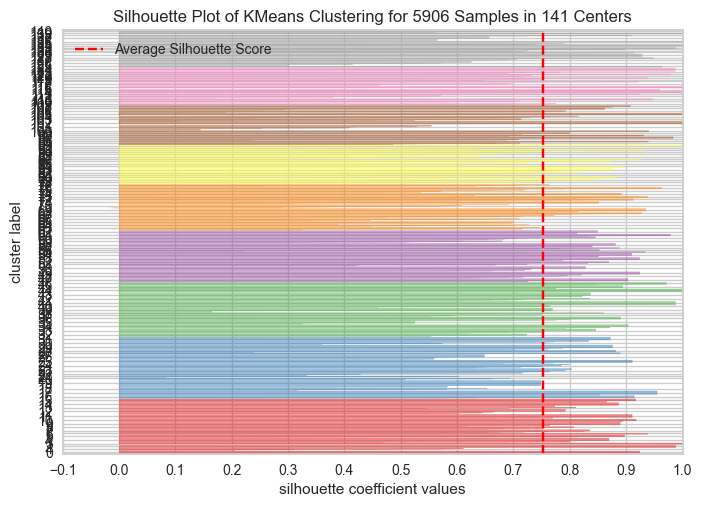

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5906 Samples in 141 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# Instantiate the clustering model and visualizer 
model = KMeans(141)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_tsne_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data